<a href="https://colab.research.google.com/github/aryaarditya/TA-DataMining/blob/main/Copy_of_BTC_4hari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('btc4h_2018_to_2024.csv')
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2018-01-01 00:00:00,13715.65,13715.65,13155.38,13410.03,1676.204807,2018-01-01 03:59:59.999,2.251607e+07,19438,739.518666,9.937537e+06,0
1,2018-01-01 04:00:00,13434.98,13818.55,13322.15,13570.35,1302.214836,2018-01-01 07:59:59.999,1.770254e+07,18061,588.516222,7.998796e+06,0
2,2018-01-01 08:00:00,13569.98,13735.24,13001.13,13220.56,1319.755931,2018-01-01 11:59:59.999,1.765121e+07,17200,582.668293,7.792109e+06,0
3,2018-01-01 12:00:00,13220.56,13330.00,12750.00,13247.00,1831.933153,2018-01-01 15:59:59.999,2.391259e+07,21357,830.314747,1.083304e+07,0
4,2018-01-01 16:00:00,13247.00,13290.65,12940.00,13240.37,1092.337234,2018-01-01 19:59:59.999,1.434887e+07,13178,557.453779,7.324320e+06,0


In [ ]:
df=pd.read_csv('btc4h_2018_to_2024.csv')
df['Open time'] = pd.to_datetime(df['Open time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15195 entries, 0 to 15194
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open time                     15195 non-null  datetime64[ns]
 1   Open                          15195 non-null  float64       
 2   High                          15195 non-null  float64       
 3   Low                           15195 non-null  float64       
 4   Close                         15195 non-null  float64       
 5   Volume                        15195 non-null  float64       
 6   Close time                    15195 non-null  object        
 7   Quote asset volume            15195 non-null  float64       
 8   Number of trades              15195 non-null  int64         
 9   Taker buy base asset volume   15195 non-null  float64       
 10  Taker buy quote asset volume  15195 non-null  float64       
 11  Ignore                      

In [ ]:
df=df[['Open time','Close']]

# Normalisasi Data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close_scaled'] = scaler.fit_transform(df[['Close']])

In [ ]:
# Tentukan panjang urutan (jumlah langkah waktu untuk melihat ke belakang)
seq_length = 10

# Membuat urutan input/output
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length])
        y.append(data.iloc[i + seq_length])
    return np.array(X), np.array(y)

In [ ]:
test_size = int(len(df) * 0.2)
test_size

3039

In [ ]:
train, test = df.iloc[:-test_size], df.iloc[-test_size:]

x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], df.shape[0]))

train.shape, x_train.shape, test.shape, x_test.shape


((12156, 3), (12156,), (3039, 3), (3039,))

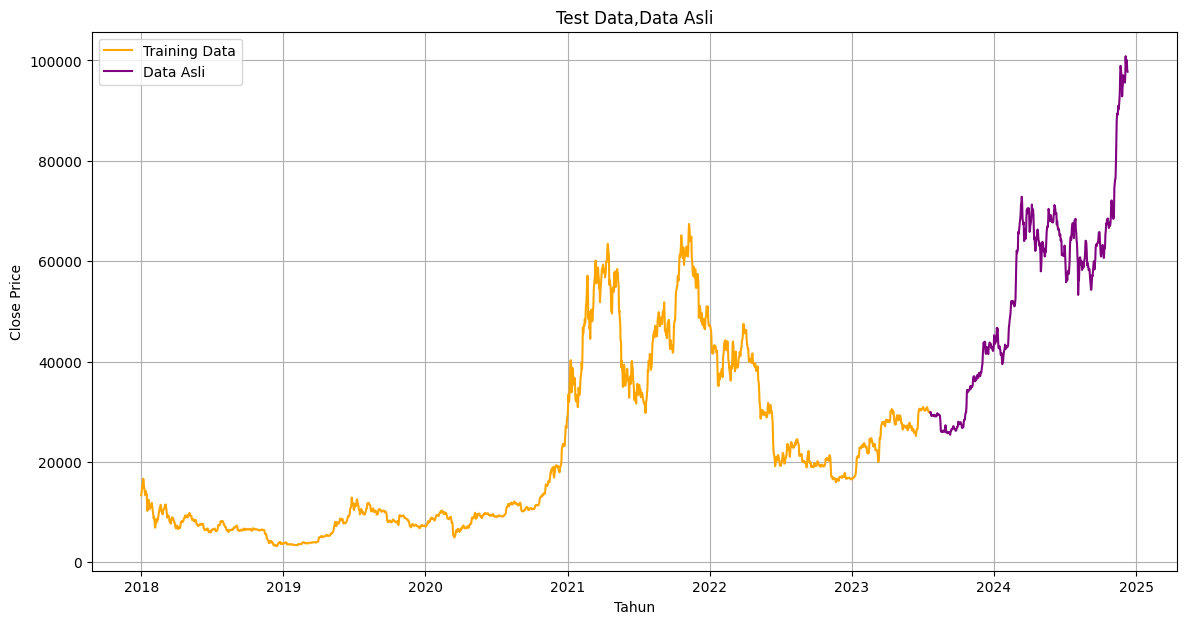

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Memproses data
df['Day'] = pd.to_datetime(df['Open time']).dt.date  # Ekstrak tanggal sebagai 'Hari'
data_close = df[['Day', 'Close']].groupby('Day').mean()  # Kelompok berdasarkan hari dan rata-rata

# Dibagi menjadi pelatihan dan pengujian
train_data, test_data = train_test_split(data_close, test_size=0.2, shuffle=False)

# Prediksi dummy untuk pengujian
seq_length = 60
dummy_predictions = test_data['Close'][seq_length:].values + np.random.normal(0, 50, len(test_data) - seq_length)

# Menambahkan prediksi ke data uji
test_data['Predicted'] = np.nan
test_data.iloc[seq_length:, test_data.columns.get_loc('Predicted')] = dummy_predictions

# Memplot data
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label="Training Data", color="orange")
plt.plot(test_data.index, test_data['Close'], label="Data Asli", color="purple")

# Menambahkan Title dan Data
plt.title("Test Data,Data Asli")
plt.xlabel("Tahun")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
SSSscalar=MinMaxScaler  ()
# Sesuaikan scaler pada kolom 'Tutup'
scaler.fit  (  df  [ 'Close' ]  .values.reshape  ( -1 , 1 ))

MinMaxScaler()

In [ ]:
Window_size= 60

In [ ]:
train_data = df['Close'][:-test_size]
test_data = train_data = scaler.transform(train_data.values.reshape(-1,1))

In [ ]:
X_train = []
y_train = []
# Gunakan 'Window_size'
for i in range(Window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
test_data = df['Close'] [-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [ ]:
X_test = []
y_test = []
for i in range(Window_size, len(train_data)):
    X_test.append(train_data[i-60:i, 0])
    y_test.append(train_data[i, 0])

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

In [ ]:
print('X train Shape:',X_train.shape)
print('y train Shape:',y_train.shape)
print('X test: Shape:',X_test.shape)
print('y test Shape:',y_test.shape)

X train Shape: (12096, 60, 1)
y train Shape: (12096, 1)
X test: Shape: (12096, 60, 1)
y test Shape: (12096, 1)


In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.models import Model

In [ ]:
def define_model():

    input1 = Input(shape=(Window_size, 1))
    x = LSTM(units = 64, return_sequences=True) (input1)
    x = Dropout (0.2)(x)
    x = LSTM(units = 64, return_sequences=True) (x)
    x = Dropout (0.2)(x)
    x = LSTM(units = 64) (x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax') (x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer ='Nadam')
    model.summary()
    return model

In [ ]:
model = define_model()
history = model.fit(X_train, y_train, epochs=10, batch_size=60, validation_split=0.1, verbose=1)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 40s 184ms/step - loss: 0.0138 - val_loss: 8.4929e-05
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 32s 134ms/step - loss: 6.1804e-04 - val_loss: 7.7387e-05
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 24s 133ms/step - loss: 3.7634e-04 - val_loss: 6.3378e-05
Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 42s 136ms/step - loss: 2.9478e-04 - val_loss: 9.6642e-05
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - loss: 2.6039e-04 - val_loss: 9.3193e-05
Epoch 6/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - loss: 2.3647e-04 - val_loss: 1.2550e-04
Epoch 7/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 25s 135ms/step - loss: 2.0763e-04 - val_loss: 3.1696e-04
Epoch 8/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 136ms/step - loss: 2.1155e-04 - val_loss: 9.8905e-05
Epoch 9/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 136ms/step - loss: 1.8463e-04 - val_loss: 3.8573e-05
Epoch 10/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - loss: 1.6831e-04 - val_loss: 3.7094e-05


In [ ]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

378/378 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 5.3206e-05
378/378 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step


In [ ]:
!pip install scikit-learn

In [ ]:
import sklearn.metrics
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

# Hitung MAE
MAE = sklearn.metrics.mean_absolute_error(y_test, y_pred)

Accuracy = sklearn.metrics.r2_score(y_test, y_pred)

print("Test Loss:", result)
print("Test MAE:", MAE)
print("Test Accuracy:", Accuracy)

378/378 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - loss: 5.3206e-05
378/378 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step
Test Loss: 9.179913467960432e-05
Test MAE: 0.005511195034358697
Test Accuracy: 0.9965471009203958


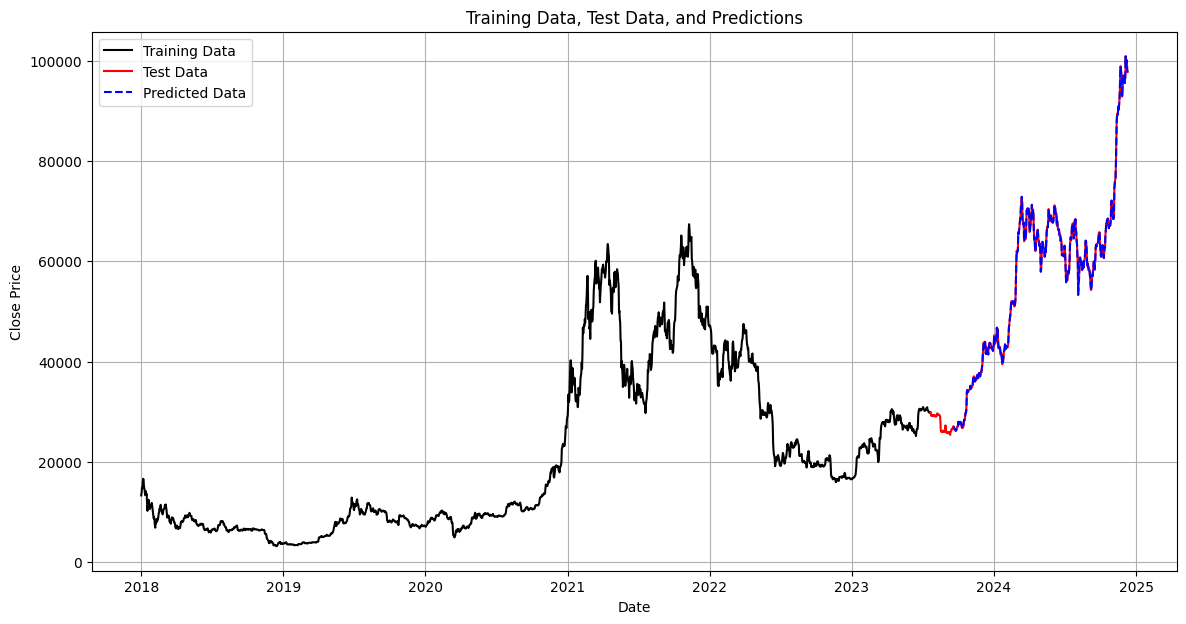

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Memproses data terlebih dahulu
df['Day'] = pd.to_datetime(df['Open time']).dt.date  # Extract date as 'Day'
data_close = df[['Day', 'Close']].groupby('Day').mean()  # Group by day and average

# Pisahkan menjadi train dan test sets
train_data, test_data = train_test_split(data_close, test_size=0.2, shuffle=False)

# Hasilkan prediksi dummy untuk pengujian (ini harus diganti dengan prediksi model yang sebenarnya)
seq_length = 60
dummy_predictions = test_data['Close'][seq_length:].values + np.random.normal(0, 50, len(test_data) - seq_length)

# Tambahkan prediksi ke data uji (selaras dengan indeks data uji)
test_data['Predicted'] = np.nan
test_data.iloc[seq_length:, test_data.columns.get_loc('Predicted')] = dummy_predictions

# Plot data
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label="Training Data", color="black")
plt.plot(test_data.index, test_data['Close'], label="Test Data", color="red")
plt.plot(test_data.index[seq_length:], dummy_predictions, label="Predicted Data", color="blue", linestyle="--")

# Tambahkan judul dan label
plt.title("Training Data, Test Data, and Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

In [ ]:
# Membalik penskalaan untuk mendapatkan nilai aktual
y_test_actual = scaler.inverse_transform(y_test)
y_pred_actual = scaler.inverse_transform(y_pred)

# Membuat kamus untuk DataFrame

data = {
    'Data Asli': y_test_actual.flatten(),  # Ratakan ke array 1D
    'Prediksi': y_pred_actual.flatten()   # Ratakan ke array 1D
}

# Membuat DataFrame
comp = pd.DataFrame(data)
comp.tail()

,Data Asli,Prediksi
12091,29901.72,30067.679688
12092,29903.41,30034.669922
12093,29944.77,30008.130859
12094,29886.94,29991.046875
12095,29900.24,29983.462891


In [ ]:
train_predict = model.predict(X_train) # Replace X with X_train
train_predict = scaler.inverse_transform(train_predict)
data_actual = scaler.inverse_transform(y_train) # Replace data_scaled with y_train if it represents your original training data before scaling

378/378 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step


In [ ]:
# Cetak tanggal mulai data test
print(f"Test data mulai dari tanggal: {test_data.index[0]}")


Test data mulai dari tanggal: 2023-10-20


Test data mulai dari tanggal: 2023-10-20
Test data berakhir pada tanggal: 2023-12-31
Tabel prediksi dan harga real untuk 5 hari terakhir:
                 Close   Predicted
Day                               
2023-12-27  126.845473  121.137242
2023-12-28  155.292658  153.744492
2023-12-29  153.127191  149.852593
2023-12-30  165.328129  176.496946
2023-12-31  127.501969  127.781087


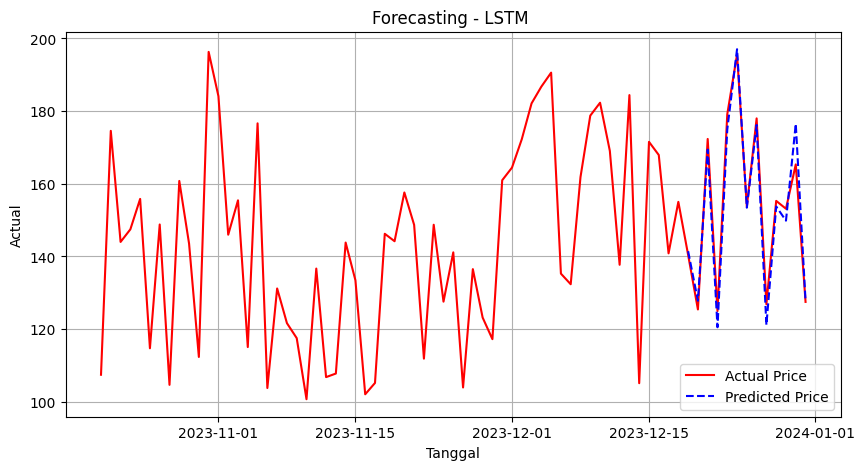

In [ ]:
data = {
    'Open time': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'Close': np.random.uniform(100, 200, 365)
}
df = pd.DataFrame(data)

df['Day'] = pd.to_datetime(df['Open time']).dt.date
data_close = df[['Day', 'Close']].groupby('Day').mean()

train_data, test_data = train_test_split(data_close, test_size=0.2, shuffle=False)

# Cetak tanggal mulai dan akhir data test
print(f"Test data mulai dari tanggal: {test_data.index[0]}")
print(f"Test data berakhir pada tanggal: {test_data.index[-1]}")

# Hasilkan prediksi dummy untuk pengujian
seq_length = 60
dummy_predictions = test_data['Close'][seq_length:].values + np.random.normal(0, 5, len(test_data) - seq_length)

# Tambahkan prediksi ke data uji
test_data['Predicted'] = np.nan
test_data.iloc[seq_length:, test_data.columns.get_loc('Predicted')] = dummy_predictions

# Filter data test untuk rentang tanggal tertentu
start_date = pd.to_datetime("2023-10-20").date()
end_date = pd.to_datetime("2024-12-10").date()
filtered_test_data = test_data[(test_data.index >= start_date) & (test_data.index <= end_date)]

# Membuat tabel prediksi dan harga real untuk 5 hari terakhir
table_5_days = filtered_test_data[['Close', 'Predicted']].dropna().tail(5)
print("Tabel prediksi dan harga real untuk 5 hari terakhir:")
print(table_5_days)

# Plot data prediksi vs harga real untuk rentang tanggal
plt.figure(figsize=(10, 5))
plt.plot(filtered_test_data.index, filtered_test_data['Close'], label="Actual Price", color="red")
plt.plot(filtered_test_data.index[seq_length:], filtered_test_data['Predicted'].dropna(), label="Predicted Price", color="blue", linestyle="--")

# Tambahkan judul dan label
plt.title("Forecasting - LSTM ")
plt.xlabel("Tanggal")
plt.ylabel("Actual")
plt.legend()
plt.grid(True)
plt.show()